In [1]:
import sys
import os

# Obtén la ruta absoluta de la carpeta que contiene este archivo
ruta_actual = os.getcwd()

# Construye la ruta a la carpeta que contiene 'modulo1.py'
ruta_src = os.path.join(ruta_actual, '..')

# Agrega la ruta de la carpeta a sys.path
sys.path.append(ruta_src)

In [2]:
from data_preprocess.data_preprocess import DataPreprocess
data_path = "../data/Txs_LoteriaBlacksmith.xlsx"
p1 = DataPreprocess(data_path, index_column='FechaTx', target_column = 'Cantidad')
p1.remove_irrelevant_features(del_columns=['IdCliente','NomProducto','CodProducto'])

In [3]:
array = p1.output_dataframe.groupby(by='CodSDV', sort=True)['Cantidad'].sum().sort_values(ascending=False).head(25).reset_index()['CodSDV'].unique()
array = list(array)
array[1]

123340

In [4]:
p1.filter_dataframe_by_feature(filter_column='CodSDV',filter_value=array[1])

In [5]:
p1.output_dataframe

,Genero,CodOficina,CodSDV,CodCanal,FechaTx,HoraTx,Cantidad,Ingreso
509,F,2926401,123340,1,2022-06-03,21,1,3000
565,SC,2926401,123340,1,2022-06-03,19,1,3000
569,F,2926401,123340,1,2022-06-03,21,1,3000
990,SC,2926401,123340,1,2022-06-06,9,22,76000
1042,SC,2926401,123340,1,2022-06-06,12,23,81000
...,...,...,...,...,...,...,...,...
71218,SC,2926401,123340,1,2023-04-14,14,6,16000
71219,SC,2926401,123340,1,2023-04-14,18,6,30000
71295,SC,2926401,123340,1,2023-04-14,20,3,19000
71296,SC,2926401,123340,1,2023-04-14,21,2,4000


In [6]:
p1.grouped_dataframe_by_feature(grouped_column ='CodSDV')

In [7]:
p1.output_dataframe

,FechaTx,Cantidad
0,2022-06-03,3
1,2022-06-06,78
2,2022-06-07,94
3,2022-06-08,81
4,2022-06-09,59
...,...,...
173,2023-03-29,65
174,2023-04-10,124
175,2023-04-12,70
176,2023-04-13,64


In [8]:
p1.completed_timeserie_df()

In [9]:
p1.output_dataframe

,Cantidad
2022-06-03,3
2022-06-04,0
2022-06-05,0
2022-06-06,78
2022-06-07,94
...,...
2023-04-10,124
2023-04-11,0
2023-04-12,70
2023-04-13,64


In [10]:
p1.feature_generation()
p1.handle_missing_values()
p1.split_data(split = 7)

In [11]:
p1.output_dataframe

,Cantidad,DiaSemana,Mes,Dia,EsQuincena,EsFestivo,media_movil
index,,,,,,,
2022-06-10,110,4,6,10,False,False,45.000000
2022-06-11,91,5,6,11,False,False,60.285714
2022-06-12,0,6,6,12,False,False,73.285714
2022-06-13,39,0,6,13,False,False,73.285714
2022-06-14,47,1,6,14,False,False,67.714286
...,...,...,...,...,...,...,...
2023-04-10,124,0,4,10,False,False,0.000000
2023-04-11,0,1,4,11,False,False,17.714286
2023-04-12,70,2,4,12,False,False,17.714286


In [12]:
from train.forecaster_model import ForecasterModel

In [13]:
y = 'Cantidad'
steps = 7
sel_exog = ['Mes', 'Dia','media_movil']#, 'DiaSemana','EsQuincena', 'EsFestivo']
data_train = p1.data_train
data_test  = p1.data_test
# Lags used as predictors
lags_grid = [7, 21, 60]#[7, 14, 21, 30, 60]
metric = ['mean_absolute_error','mean_squared_error']

In [14]:
forecaster_model = ForecasterModel(steps,lags_grid,metric)

In [15]:
forecaster_model.train_model(data_train,y)

Number of models compared: 30.


lags grid: 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60] 
  Parameters: {'ridge__alpha': 0.46415888336127775}
  Backtesting metric: 30.718243624432443

Modelo ridge ha sido entrenado
Number of models compared: 144.


lags grid: 100%|██████████| 3/3 [00:30<00:00, 10.10s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] 
  Parameters: {'xgbregressor__colsample_bytree': 0.6, 'xgbregressor__gamma': 1, 'xgbregressor__max_depth': 5, 'xgbregressor__min_child_weight': 1, 'xgbregressor__subsample': 1}
  Backtesting metric: 27.418021448322985

Modelo xgbregressor ha sido entrenado
Number of models compared: 30.


params grid:  30%|███       | 9/30 [00:46<02:36,  7.47s/it]c:\repos\prueba-loteria-blacksmith\.conda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
params grid:  33%|███▎      | 10/30 [01:20<05:15, 15.78s/it]c:\repos\prueba-loteria-blacksmith\.conda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
params grid:  37%|███▋      | 11/30 [01:52<06:32, 20.64s/it]c:\repos\prueba-loteria-blacksmith\.conda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
params grid:  40%|████      | 12/30 [02:23<07:09, 23.84s/it]c:\repos\prueba-loteria-blacksmith\

`Forecaster` refitted using the best-found parameters, and the whole data set: 
  Parameters: {'order': (7, 0, 0), 'seasonal_order': (0, 0, 0, 0), 'trend': 'n'}
  Backtesting metric: 28.612083329595873

Modelo arima ha sido entrenado
Number of models compared: 180.


lags grid: 100%|██████████| 3/3 [04:02<00:00, 80.91s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60] 
  Parameters: {'mlpregressor__activation': 'relu', 'mlpregressor__alpha': 0.0001, 'mlpregressor__hidden_layer_sizes': (50, 50), 'mlpregressor__learning_rate': 'constant', 'mlpregressor__solver': 'adam'}
  Backtesting metric: 28.079467923801868

Modelo mlpregressor ha sido entrenado


In [16]:
forecaster_model.models

{'ridge': {'model': Ridge(random_state=123),
  'hiperparameters': {'ridge__alpha': array([1.00000000e-03, 7.74263683e-03, 5.99484250e-02, 4.64158883e-01,
          3.59381366e+00, 2.78255940e+01, 2.15443469e+02, 1.66810054e+03,
          1.29154967e+04, 1.00000000e+05])},
  'trained_model': ================= 
  ForecasterAutoreg 
  Regressor: Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                  ('ridge', Ridge(alpha=0.46415888336127775, random_state=123))]) 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
   25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
   49 50 51 52 53 54 55 56 57 58 59 60] 
  Transformer for y: None 
  Transformer for exog: None 
  Window size: 60 
  Weight function included: False 
  Exogenous included: False 
  Type of exogenous variable: None 
  Exogenous variables names: None 
  Training range: [Timestamp('2022-06-10 00:00:00'), Timestamp('2023-04-07 00:00:00')] 
  Training index type: Dat

In [17]:
forecaster_model.evaluate_models(data_test)

----------------------------------------
Métricas de modelo ridge:
--mse: 2287.477642838122
--mape: 4.400687539033906e+16
--r2: -0.08787953741622001
----------------------------------------
Métricas de modelo xgbregressor:
--mse: 3005.2167926836596
--mape: 6.428886823712475e+16
--r2: -0.4292222109781363
----------------------------------------
Métricas de modelo arima:
--mse: 4489.714285714285
--mape: 0.7478683948328134
--r2: -1.1352201257861636
----------------------------------------
Métricas de modelo mlpregressor:
--mse: 3265.5612927664197
--mape: 2.629839849524146e+16
--r2: -0.5530369530393915


In [18]:
forecaster_model.results

{'ridge': {'mse': 2287.477642838122,
  'mape': 4.400687539033906e+16,
  'r2': -0.08787953741622001},
 'xgbregressor': {'mse': 3005.2167926836596,
  'mape': 6.428886823712475e+16,
  'r2': -0.4292222109781363},
 'arima': {'mse': 4489.714285714285,
  'mape': 0.7478683948328134,
  'r2': -1.1352201257861636},
 'mlpregressor': {'mse': 3265.5612927664197,
  'mape': 2.629839849524146e+16,
  'r2': -0.5530369530393915}}

In [19]:
resultado_prueba = {'ridge': {'mse': 2287.477642838122,
  'mape': 4.400687539033906e+16,
  'r2': -0.08787953741622001},
 'xgbregressor': {'mse': 3005.2167926836596,
  'mape': 6.428886823712475e+16,
  'r2': -0.4292222109781363},
 'arima': {'mse': 4489.714285714285,
  'mape': 0.7478683948328134,
  'r2': -1.1352201257861636},
 'mlpregressor': {'mse': 3265.5612927664197,
  'mape': 2.629839849524146e+16,
  'r2': -0.5530369530393915}}

In [20]:
from train.competition import MetricsCompetition

In [21]:

competition = MetricsCompetition(resultado_prueba)

In [22]:
competition.results

{'ridge': {'mse': 2287.477642838122,
  'mape': 4.400687539033906e+16,
  'r2': -0.08787953741622001},
 'xgbregressor': {'mse': 3005.2167926836596,
  'mape': 6.428886823712475e+16,
  'r2': -0.4292222109781363},
 'arima': {'mse': 4489.714285714285,
  'mape': 0.7478683948328134,
  'r2': -1.1352201257861636},
 'mlpregressor': {'mse': 3265.5612927664197,
  'mape': 2.629839849524146e+16,
  'r2': -0.5530369530393915}}

In [23]:
competition.available_metrics

dict_keys(['mse', 'mape', 'r2'])

In [24]:
winner_name, winner_metrics = competition.evaluated_best_model()

In [25]:
winner_metrics

{'mse': 2287.477642838122,
 'mape': 4.400687539033906e+16,
 'r2': -0.08787953741622001}

In [26]:
winner_name

'ridge'

In [27]:
competition.best_model

'ridge'

In [28]:
competition.best_metrics


{'mse': 2287.477642838122,
 'mape': 4.400687539033906e+16,
 'r2': -0.08787953741622001}

In [29]:
forecaster_model.select_best_model()

print(f'winner: {forecaster_model.best_model_name}  metrics = {forecaster_model.best_model_metrics}')

winner: ridge  metrics = {'mse': 2287.477642838122, 'mape': 4.400687539033906e+16, 'r2': -0.08787953741622001}


In [30]:
len(forecaster_model.best_model.lags)

60

In [31]:
# Predict
# ==============================================================================
# Predict only a subset of steps
predictions = forecaster_model.best_model.predict(steps=steps, last_window=p1.output_dataframe[y].iloc[-len(forecaster_model.best_model.lags):])#, exog=data_test[['DiaSemana','Mes','EsFestivo']])
display(predictions)

2023-04-15    78.842552
2023-04-16    69.280359
2023-04-17    47.729223
2023-04-18    10.741132
2023-04-19    -0.218256
2023-04-20    17.771240
2023-04-21    13.009799
Freq: D, Name: pred, dtype: float64

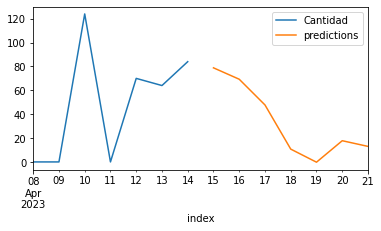

In [32]:
import matplotlib.pyplot as plt
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3))
data_test[[y]].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [33]:
window_size = forecaster_model.best_model.window_size
window_size

60

In [47]:
forecaster_model.best_model.regressor.get_params()

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler()),
  ('ridge', Ridge(alpha=0.46415888336127775, random_state=123))],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(),
 'ridge': Ridge(alpha=0.46415888336127775, random_state=123),
 'minmaxscaler__clip': False,
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'ridge__alpha': 0.46415888336127775,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__positive': False,
 'ridge__random_state': 123,
 'ridge__solver': 'auto',
 'ridge__tol': 0.0001}

In [50]:
# Predict
# ==============================================================================
# Predict only a subset of steps
predictions = forecaster_model.best_model.predict(steps=steps,last_window=p1.output_dataframe[y].iloc[-window_size:])#, exog=data_test[['DiaSemana','Mes','EsFestivo']])
display(predictions)

2023-04-15    78.842552
2023-04-16    69.280359
2023-04-17    47.729223
2023-04-18    10.741132
2023-04-19    -0.218256
2023-04-20    17.771240
2023-04-21    13.009799
Freq: D, Name: pred, dtype: float64

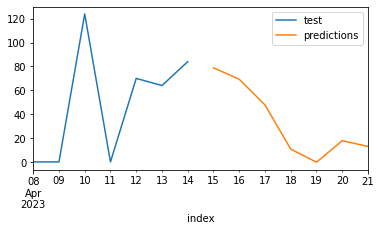

In [51]:
fig, ax = plt.subplots(figsize=(6, 3))
data_test[y].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();